## Final project for P2:
## What factors will affect the survival rate of passengers on Titanic?

# 1.The ticket class

The first question will be: Does the ticket class affect the survival rate? There are three types of ticket classes on Titanic: 1st, 2nd and 3rd. As we know, the 1st class is near the deck while the 3rd class is close to the bottom. So theoretically, people in 1st class will have better change to be saved. Therefore, we can make a hypothesis: People in 1st class had higher survival rate than people in 3rd class.

To test the hypothesis, we need to open the raw data first:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('titanic-data.csv')

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Then make a contingency table to see the relationship between ticket class (Pclass) and survival (Survived).

In [3]:
crosstab = pd.crosstab(data['Survived'], data['Pclass'])

In [4]:
crosstab

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Then calculate survival rate for different class:

In [5]:
survival_rate = crosstab.iloc[1] / crosstab.sum()

In [6]:
survival_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

As we can see, the survival rate of people in 1st calss is the highest (about 63.0%) while that of 3rd class is only about 24.2% and survival rate for people in 2nd is at the middle (about 47.3%). Let's make a bar chart to make results more visual:

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


([<matplotlib.axis.XTick at 0x18dbf7380b8>,
 <a list of 3 Text xticklabel objects>)

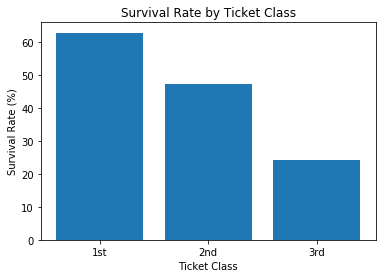

In [8]:
plt.bar(survival_rate.index, survival_rate.values*100)
plt.ylabel('Survival Rate (%)')
plt.xlabel('Ticket Class')
plt.title('Survival Rate by Ticket Class')
plt.xticks([1,2,3],('1st', '2nd', '3rd'))

Form the bar chart above, we can see that it is obvious that there is strong association between ticket class and survival. But to be precise, we need to conduct a statistical test. Because both the variables are categorical, here I perform Chi-square test based on previously made contingency table. I use scipy library to do this.

In [9]:
from scipy.stats import chi2_contingency

test = chi2_contingency(crosstab)

In [10]:
print('p value is', test[1])
if test[1] < 0.05:
    print('statistically significant')
else:
    print('not statistically significant')

p value is 4.549251711298793e-23
statistically significant


The conclusion is: These data show that the survival of people on Titanic was statistically significantly associated with their ticket class (p = 4.549251711298793e-23). People in 1st class had the highest survival rate (about 63.0%). The survival rate of people in 2nd class was lower (about 47.3%). Finally, only about 24.2% of people in 3rd class survived that shipwreck.

# 2. Gender

In movie Titanic, we have seen that many gentlemen had given up their chance to be saved to let women board lifeboats first. Is that the truth or just a film action? If it is true, we can make a hypothesis: The survival rate of wowen is significantly higher than that of men. Here I use similar procedure to test this hypothesis.

As the data set is already opened, the first thing to do is to make a contingency table:

In [11]:
crosstab = pd.crosstab(data['Survived'], data['Sex'])

In [12]:
crosstab

Sex,female,male
Survived,,
0,81,468
1,233,109


Then calculate survival rate for each gender:

In [13]:
survival_rate = crosstab.iloc[1] / crosstab.sum()

In [14]:
survival_rate

Sex
female    0.742038
male      0.188908
dtype: float64

Text(0.5,1,'Survival Rate by Gender')

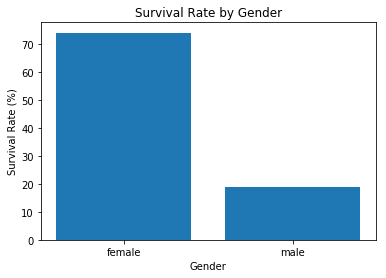

In [15]:
plt.bar(survival_rate.index, survival_rate.values*100)
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.title('Survival Rate by Gender')

Female's survival rate is over 70% while male's survival rate is less than 20%. To be precise, we need to conduct a statistical test.

In [16]:
from scipy.stats import chi2_contingency

test = chi2_contingency(crosstab)
print('p value is', test[1])
if test[1] < 0.05:
    print('statistically significant')
else:
    print('not statistically significant')

p value is 1.1973570627755645e-58
statistically significant


The conclusion is: These data show that the survival of people on Titanic was statistically significantly associated with their gender (p = 1.1973570627755645e-58). Females have higher survival rate (74.2%), while males' survival rate is much lower, which is only 18.9%.

# 3. Age

Age is another factor which may affect survival rate. On the one hand, children and old people may be too clumsy to escape from the sinking ship. On the other hand, they may receive more attention from gentlemen and get better chances to board lifeboats. Here, I will not put forward any hypotheses. Instead, I will explore the data step by step. 

First, I need to exam the age data by survival groups.

In [17]:
data.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


The mean age of survivor group is 28.3, which is younger than the age of victim group (30.6). However, the median age of two group is the same, which is 28.0. Let's treat age as a continuous variable first. The best way is to conduct a t-test to compare the means of age of two groups to see whether their means are signigicantly different. But before that, we need to exam the normality of the age sample.

Let's make a histogram firstly to test normality visually.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

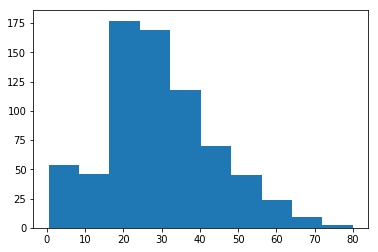

In [18]:
plt.hist(data['Age'][pd.notna(data['Age'])])

Obviously, the distribution is not normal. It is positively skewed. Then we run a normal test to confirm.

In [19]:
from scipy import stats
stats.normaltest(data['Age'][pd.notna(data['Age'])])

NormaltestResult(statistic=18.105032952089758, pvalue=0.00011709599657350757)

The pvalue is 0.0001. If we set the confidence level 0.05, the null hypothesis can be rejected, which means the distribution of age is not normal.Therefore, it's better to use Wilcoxon rank-sum test rather than t-test.

In [20]:
stats.ranksums(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 0]['Age'])

RanksumsResult(statistic=-3.288931503928799, pvalue=0.0010056849511404726)

The pvalue is 0.001. If we set the confidence level 0.05, the null hypothesis can be rejected, which means the of age distribution of two groups are not equal. Let's make two histograms to compare age distribution of two groups detailly:

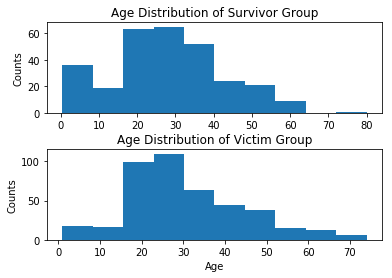

In [21]:
plt.subplot(2, 1, 1)
plt.hist(data.loc[(data['Survived'] == 1) & (pd.notna(data['Age']))]['Age'])
plt.title('Age Distribution of Survivor Group')
plt.ylabel('Counts')
plt.subplot(2, 1, 2)
plt.hist(data.loc[(data['Survived'] == 0) & (pd.notna(data['Age']))]['Age'])
plt.title('Age Distribution of Victim Group')
plt.ylabel('Counts')
plt.xlabel('Age')
plt.subplots_adjust(hspace = 0.4)

The figure shows that the survivor group seems have more children and less old people. But to be quantitative, first, we need to convert continuous group into three ordinal groups: children (age < 18), middle (age 18~50) and old (age > 50). Then calculate survival rate for each group.

In [22]:
data['Age_cat'] = pd.cut(data['Age'], [0, 18, 50, 80], labels=['children', 'middle',' old'])
data['Age_cat'] = data['Age_cat'].astype('object')

In [23]:
crosstab = pd.crosstab(data['Survived'], data['Age_cat'])

In [24]:
crosstab

Age_cat,old,children,middle
Survived,,,
0,42,69,313
1,22,70,198


In [25]:
survival_rate = crosstab.iloc[1] / crosstab.sum()

In [26]:
survival_rate

Age_cat
 old        0.343750
children    0.503597
middle      0.387476
dtype: float64

([<matplotlib.axis.XTick at 0x18dc032ec50>,
 <a list of 3 Text xticklabel objects>)

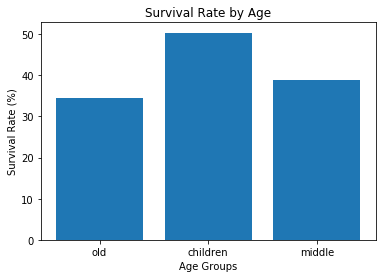

In [27]:
plt.bar(survival_rate.index, survival_rate.values*100)
plt.ylabel('Survival Rate (%)')
plt.xlabel('Age Groups')
plt.title('Survival Rate by Age')
plt.xticks([0,1,2],('old', 'children', 'middle'))

According to the result, about half of children have survived. However, only 34.3% of old people and 38.7% of middle aged people survived. To test the significance, it is not enough to do a single Chi-square test. We need to split the original contingency table into two tables: children~middle and old~middle to test significance respectively.

In [28]:
crosstab_old = crosstab.iloc[:,[0,2]]
crosstab_children = crosstab.iloc[:,[1,2]]

In [29]:
from scipy.stats import chi2_contingency

test = chi2_contingency(crosstab_children)
print('p value is', test[1])
if test[1] < 0.05:
    print('statistically significant')
else:
    print('not statistically significant')

p value is 0.017845634690218725
statistically significant


In [30]:
from scipy.stats import chi2_contingency

test = chi2_contingency(crosstab_old)
print('p value is', test[1])
if test[1] < 0.05:
    print('statistically significant')
else:
    print('not statistically significant')

p value is 0.5877627142126838
not statistically significant


The conclusion is: The survival rate (50.4%) of children (age < 18)  is statistically significantly higher than that (38.7%) of middle aged people (age 18~50). But the survival rate (34.4%) of old people (age > 50)  is not statistically significantly different from that (38.7%) of middle aged people (age 18~50).

# 4. Companionship

There are two columns in the dataset: One is 'SibSp', which means traveling with sibling or spouse. Another is 'Parch', which means traveling with parent or child. Does companionship promote survival rate? Which kind of companionship is better, Sibling/ Spouse or Parent/ Child?

First, we need to find out who traveled with and without relatives, and figure out survival rate for each group.

In [31]:
data['Accompanied'] = (data['SibSp'] != 0) | (data['Parch'] != 0)

In [32]:
crosstab = pd.crosstab(data['Survived'], data['Accompanied'])

In [33]:
crosstab 

Accompanied,False,True
Survived,,
0,374,175
1,163,179


In [34]:
crosstab.iloc[1] / crosstab.sum()

Accompanied
False    0.303538
True     0.505650
dtype: float64

From the result above, we know that people who traveled with relatives have much higher survival rate (50.6%) than that of those who traveled alone (30.4%). Then we need to find out which kind of companionship promote survival rate most.

In [35]:
data.loc[(data['SibSp'] == 0) & (data['Parch'] == 0), 'Companionship'] = 'Neither'
data.loc[(data['SibSp'] != 0) & (data['Parch'] == 0), 'Companionship'] = 'Sibling/ Spouse'
data.loc[(data['SibSp'] == 0) & (data['Parch'] != 0), 'Companionship'] = 'Parent/ Child'
data.loc[(data['SibSp'] != 0) & (data['Parch'] != 0), 'Companionship'] = 'Both'

In [36]:
crosstab = pd.crosstab(data['Survived'], data['Companionship'])

In [37]:
crosstab

Companionship,Both,Neither,Parent/ Child,Sibling/ Spouse
Survived,,,,
0,80,374,24,71
1,62,163,47,70


In [38]:
survival_rate = crosstab.iloc[1] / crosstab.sum()

In [39]:
survival_rate

Companionship
Both               0.436620
Neither            0.303538
Parent/ Child      0.661972
Sibling/ Spouse    0.496454
dtype: float64

Text(0.5,1,'Survival Rate by Companionship')

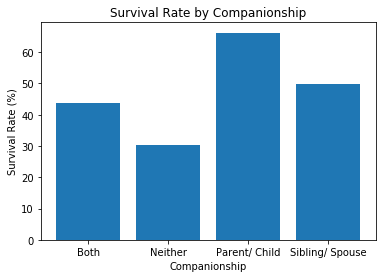

In [40]:
plt.bar(survival_rate.index, survival_rate.values*100)
plt.ylabel('Survival Rate (%)')
plt.xlabel('Companionship')
plt.title('Survival Rate by Companionship') 

We can see that all the companionship: only Parent/ Child, only Sibling/ Spouse and both (Sibling/ Spouse and Parent/ Child) can increase survival rate, compared to those who traveled without relatives (Neither). Among them, Parent/ Child relationship is the best promoter, which increases survival rate from 30.4% (Neither) to 66.2%. 

# 5. Port of Embarkation

It seems that port of embarkation cannot affect the survival rate. But let's explore it.

In [41]:
crosstab = pd.crosstab(data['Survived'], data['Embarked'])

In [42]:
crosstab

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [43]:
survival_rate = crosstab.iloc[1] / crosstab.sum()
survival_rate

Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64

([<matplotlib.axis.XTick at 0x18dc03f0be0>,
 <a list of 3 Text xticklabel objects>)

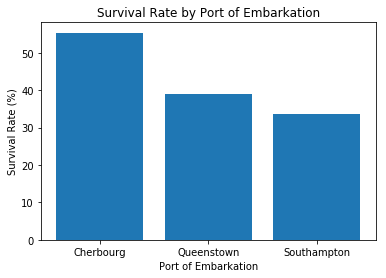

In [44]:
plt.bar(survival_rate.index, survival_rate.values*100)
plt.ylabel('Survival Rate (%)')
plt.xlabel('Port of Embarkation')
plt.title('Survival Rate by Port of Embarkation') 
plt.xticks([0,1,2],('Cherbourg', 'Queenstown', 'Southampton'))

The result shows that people who embarked in Cherbourg have the highest survival rate (55.4%), while people who embarked in Southampton have lowest survival rate (33.7%). This result seems make no sense, because it is hard to find appropriate reasons to explain this. Under this circumstance, we need to consider the effect of confounders.

There many possible confounders: ticket class, sex, age and companionship. Let's find them one by one:

5.1 Ticket class

In [45]:
cross_class_em = pd.crosstab(data['Pclass'], data['Embarked'])

In [46]:
cross_class_em

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [47]:
cross_class_em.iloc[0] / cross_class_em.sum()

Embarked
C    0.505952
Q    0.025974
S    0.197205
dtype: float64

As we can see, there are about half of 'Cherbourgers' (people who embarked in Cherbourg, the same below) held first class tickets. But only 2.6% of 'Queenstowners' and 19.7% of 'Southamptoners' held the first class tickets.

5.2 Sex

In [48]:
cross_sex_em = pd.crosstab(data['Sex'], data['Embarked'])

In [49]:
cross_sex_em

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [50]:
cross_sex_em.iloc[0] / cross_sex_em.sum()

Embarked
C    0.434524
Q    0.467532
S    0.315217
dtype: float64

In [51]:
chi2_contingency(cross_sex_em)

(13.355630515001746,
 0.0012585245232290144,
 2,
 array([[ 58.96062992,  27.02362205, 226.01574803],
        [109.03937008,  49.97637795, 417.98425197]]))

There are 43.5% of 'Cherbourgers' were females. While only 31.5% of 'Southamptoners' were females.

5.3 Age

In [52]:
cross_age_em = pd.crosstab(data['Age_cat'], data['Embarked'])

In [53]:
cross_age_em

Embarked,C,Q,S
Age_cat,,,
old,15,3,45
children,28,8,103
middle,87,17,406


In [54]:
cross_age_em.iloc[1] / cross_age_em.sum()

Embarked
C    0.215385
Q    0.285714
S    0.185921
dtype: float64

In [55]:
chi2_contingency(cross_age_em)

(4.2735083832209915,
 0.37025414777529986,
 4,
 array([[ 11.50280899,   2.47752809,  49.01966292],
        [ 25.37921348,   5.46629213, 108.15449438],
        [ 93.11797753,  20.05617978, 396.8258427 ]]))

There are 21.5% of 'Cherbourgers' and 18.6% of 'Southamptoners' were children. But the difference is not significant (p = 0.370 > 0.05).

5.4 Companionship

In [56]:
cross_com_em = pd.crosstab(data['Accompanied'], data['Embarked'])

In [57]:
cross_com_em

Embarked,C,Q,S
Accompanied,,,
False,85,57,393
True,83,20,251


In [58]:
cross_com_em.iloc[1] / cross_com_em.sum()

Embarked
C    0.494048
Q    0.259740
S    0.389752
dtype: float64

In [59]:
chi2_contingency(cross_com_em)

(12.792349142601301,
 0.0016679256151052018,
 2,
 array([[101.1023622 ,  46.33858268, 387.55905512],
        [ 66.8976378 ,  30.66141732, 256.44094488]]))

There are 49.4% of 'Cherbourgers' (people who embarked in Cherbourg, the same below) traveled with relatives, but only 39.0% of 'Southamptoners' chose not travel alone.

From the analysis above, we can draw this conclusion: People who embarked in Cherbourg have the highest survival rate (55.4%). This is probably because among these people, there are more people in 1st class, more females and more people accompanied by their relatives. And 1st class ticket holders, females and people accompanied have higher survival rate.

# 6. Conclusion

The final conclusion is: During shipwreck of Titanic, those who were in higher classes (1st > 2nd > 3rd), females, children (age < 18), and accompanied by their relatives (sibling/spouse or parent/child or both) had higher survival rate.